# Title: "TextGuard: Empowering Mobile Security through Machine Learning for SMS Spam Detection"

Problem statement : The popularity of mobile phones has led to an increase in spam text messages, resulting in outages and potentially dangerous users. To solve this problem, we aim to create an effective SMS spam detection system that uses natural language processing (NLP) as well as learning NLTK and Scikit. Using a database of over 5000 articles collected for mobile spam research, we aim to develop and train learning models that can identify spam. We aim to create solutions that can distinguish legitimate text from spam by using language processing techniques for text classification, thus improving user experience and telecommunications security.

In [ ]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

In [ ]:
#Load the Dataset
df = pd.read_csv('SMSSpamCollection.csv')

In [ ]:
#Check the randam 5 observation of our dataset
df.sample(5)

,v1,v2
5101,ham,I wnt to buy a BMW car urgently..its vry urgen...
2680,ham,I'm okay. Chasing the dream. What's good. What...
5301,ham,Hi missed your Call and my mumHas beendropping...
3190,ham,I will lick up every drop :) are you ready to ...
3088,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...


In [ ]:
#Check the shape of the dataset i.e., to see the number of rows and columns respectively
df.shape

(5568, 2)

## 1. Data Cleaning

In [ ]:
#Check the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5568 non-null   object
 1   v2      5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [ ]:
#Rename the column names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [ ]:
# Encode the 'target' column in the DataFrame to convert categorical labels into numerical values using LabelEncoder
#ham : 0 | spam : 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
#Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#Check for duplicate values
df.duplicated().sum()

403

In [ ]:
#Remove all the duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
#Now check again
df.duplicated().sum()

0

In [ ]:
#Check again the shape of the dataset i.e., to see the number of rows and columns respectively
df.shape

(5165, 2)

## 2.EDA

In [ ]:
#Display the count of each unique value in the 'target' column
df['target'].value_counts()

0    4513
1     652
Name: target, dtype: int64

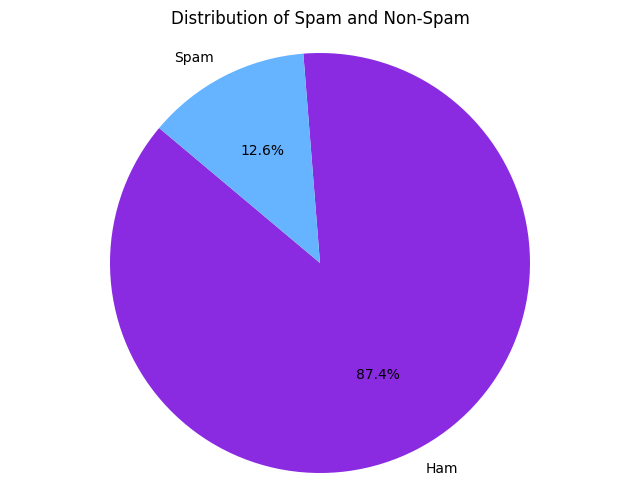

In [ ]:
#Creating a pie chart to visualize the distribution of 'ham' and 'spam' labels
import matplotlib.pyplot as plt

# Data to plot
labels = ['Ham', 'Spam']
sizes = df['target'].value_counts()
colors = ['#8a2be2', '#66b3ff']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Creating a new column 'num_characters' to calculate the number of characters in each text message
df['num_characters'] = df['text'].apply(len)

In [ ]:
#Creating a new column 'num_words' to calculate the number of words in each text message using NLTK word_tokenize function
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
#Display the changes
df.head()

,target,text,num_characters,num_words
0,0,I've been searching for the right words to tha...,196,41
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
2,0,"Nah I don't think he goes to usf, he lives aro...",61,15
3,0,Even my brother is not like to speak with me. ...,77,18
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10


In [ ]:
#Creating a new column 'num_sentences' to calculate the number of sentences in each text message using NLTK sent_tokenize function
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
#Display the changes
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,I've been searching for the right words to tha...,196,41,3
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
3,0,Even my brother is not like to speak with me. ...,77,18,2
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10,2


In [ ]:
#Generating descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences'
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5165.000000,5165.000000,5165.000000
mean,79.340949,18.591675,1.973863
std,58.445120,13.403714,1.459197
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Generating descriptive statistics for the 'ham' messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4513.000000,4513.000000,4513.000000
mean,70.911146,17.269222,1.827831
std,56.726390,13.591363,1.394743
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#Generating descriptive statistics for the 'ham' messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,652.000000,652.000000,652.000000
mean,137.690184,27.745399,2.984663
std,29.842017,6.984483,1.495434
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Function to preprocess and transform text data.
def transform_text(text):
    text = text.lower()                             #Convert text to lowercase
    text = nltk.word_tokenize(text)                 #Tokenize the text

#Removes non-alphanumeric characters and appends alphanumeric words to a list
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

#Removes stopwords and punctuation, and applies stemming to each word
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

#Joins the processed words into a single string
    return " ".join(y)

In [ ]:
#Initialize a PorterStemmer object for stemming operations
ps = PorterStemmer()

In [ ]:
#Example
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
#Display the text message at index 10 in the DataFrame
df['text'][10]

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [ ]:
#Import the PorterStemmer class from nltk.stem.porter module
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
#Apply the transform_text function to each text in the 'text' column of the DataFrame and store the results in a new column 'transformed_text'
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,I've been searching for the right words to tha...,196,41,3,search right word thank breather promis wont t...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
3,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
4,0,I HAVE A DATE ON SUNDAY WITH WILL!!,35,10,2,date sunday


The WordCloud is used to generate word clouds from text data. A word cloud visually represents the frequency of words in a text, with more frequent words appearing larger and more prominent.

In [ ]:
#Creating a WordCloud object with specified parameters
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

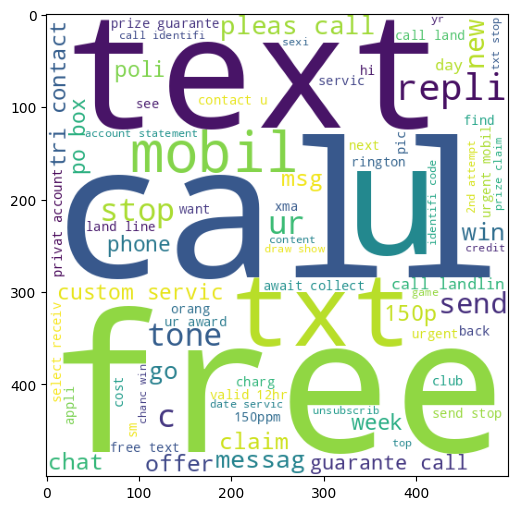

In [ ]:
#Generating a word cloud for spam messages by concatenating all transformed text of spam messages into a single string
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

#Display the word cloud for spam messages
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

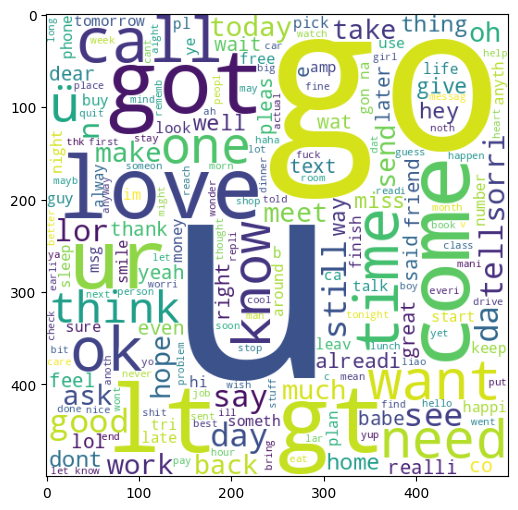

In [ ]:
#Generating a word cloud for spam messages by concatenating all transformed text of ham messages into a single string
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

#Display the word cloud for ham messages
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
#Importing necessary libraries , For creating visualizations , For counting occurrences of elements
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
spam_corpus = []

#Iterating through each message in the DataFrame where the target is spam
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():          #Splitting the message into words and iterating through each word
        spam_corpus.append(word)      #Appending each word to the spam_corpus list


#Getting the length of the spam_corpus list
len(spam_corpus)

9965

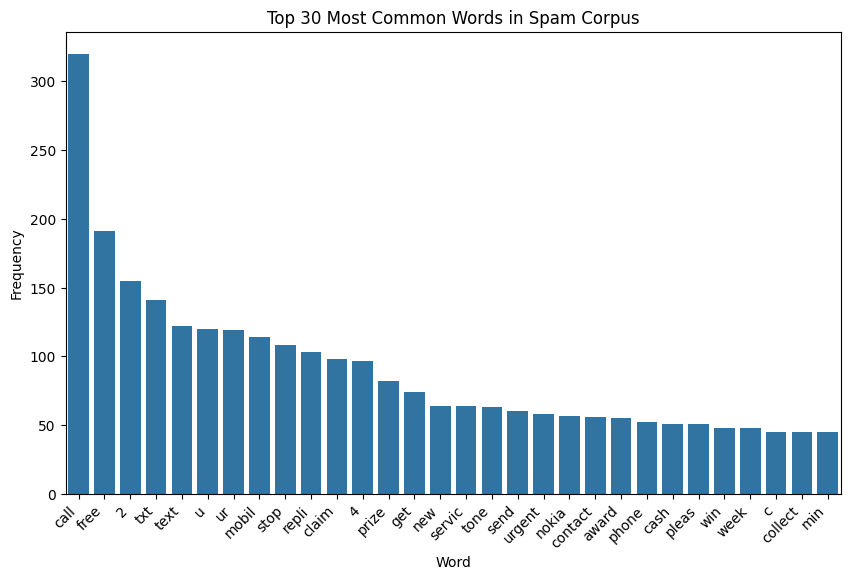

In [ ]:
#Count occurrences of words in the spam_corpus
word_counts = Counter(spam_corpus)

#Convert Counter object to a DataFrame and select the top 30 most common words
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

#Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_word_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()

In [ ]:
ham_corpus = []

#Iterating through each message in the DataFrame where the target is ham
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():           #Splitting the message into words and iterating through each word
        ham_corpus.append(word)        #Appending each word to the spam_corpus list

#Getting the length of the ham_corpus list
len(ham_corpus)

35908

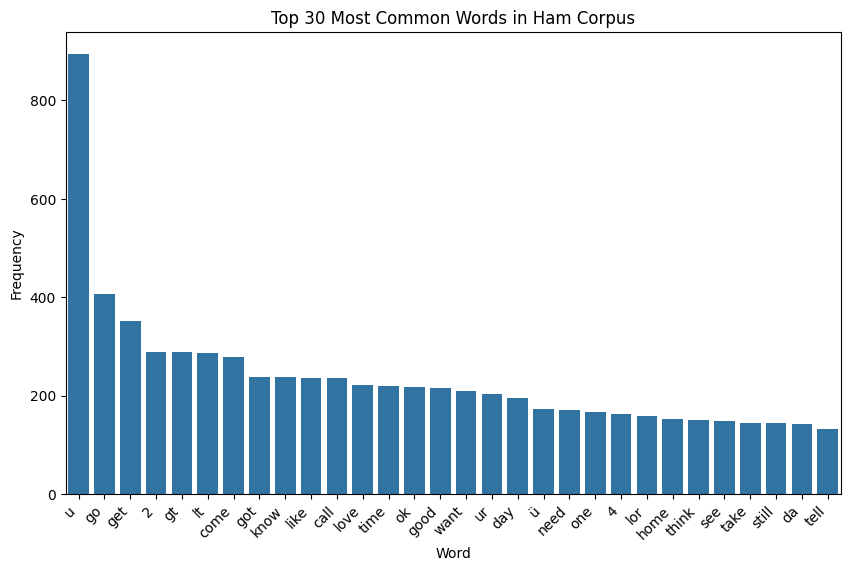

In [ ]:
#Count occurrences of words in the ham_corpus
word_counts = Counter(ham_corpus)

#Convert Counter object to a DataFrame and select the top 30 most common words
df_word_counts = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Frequency'])

#Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=df_word_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.show()

## 4. Model Building

We will be using TF-IDF (Term Frequency-Inverse Document Frequency) method for generating features.

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents. It consists of two components:

Term Frequency (TF): Measures how frequently a term occurs in a document. It's calculated as the number of times a term appears in a document divided by the total number of terms in the document.

Inverse Document Frequency (IDF): Measures the importance of a term across a collection of documents. It's calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

The TF-IDF score for a term in a document is the product of its TF and IDF values. It indicates the importance of a term in a specific document relative to its importance across all documents in the collection.

Using TF-IDF, each document is represented as a vector of TF-IDF values for each term in a predefined vocabulary. These vectors serve as features for training machine learning models.

In [ ]:
#Importing CountVectorizer and TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Initializing CountVectorizer and TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#Transforming the text data using TfidfVectorizer
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#From sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
#Appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
#Check the shape
X.shape

(5165, 3000)

In [ ]:
#Assigning the target variable
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#Importing the necessary modules for Naive Bayes classification and evaluation
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

**Gaussian Naive Bayes (GaussianNB):**
Assumes features have a Gaussian (normal) distribution.
Works well with continuous features.

**Multinomial Naive Bayes (MultinomialNB):**
Suitable for features with discrete counts.
Often used in text classification with word counts.

**Bernoulli Naive Bayes (BernoulliNB):**
Works with binary features (presence or absence).
Commonly used in text classification with binary feature representation.

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#Fit Gaussian Naive Bayes model to the training data
gnb.fit(X_train,y_train)

#Predict labels for the test data
y_pred1 = gnb.predict(X_test)

#Print accuracy score
print("Gaussian Naive accuracy score")
print(accuracy_score(y_test,y_pred1))

# Print confusion matrix
print("\nGaussian Naive confusion matrix")
print(confusion_matrix(y_test,y_pred1))

# Print precision score
print("\nGaussian Naive precision score")
print(precision_score(y_test,y_pred1))

Gaussian Naive accuracy score
0.8799612778315585

Gaussian Naive confusion matrix
[[815 103]
 [ 21  94]]

Gaussian Naive precision score
0.47715736040609136


In [ ]:
#Fit Multinomial Naive Bayes model to the training data
mnb.fit(X_train,y_train)

#Predict labels for the test data
y_pred2 = mnb.predict(X_test)

#Print accuracy score
print("Multinomial Naive accuracy score")
print(accuracy_score(y_test,y_pred2))

# Print confusion matrix
print("\nMultinomial Naive confusion matrix")
print(confusion_matrix(y_test,y_pred2))

# Print precision score
print("\nMultinomial Naive precision score")
print(precision_score(y_test,y_pred2))

Multinomial Naive accuracy score
0.9757986447241046

Multinomial Naive confusion matrix
[[916   2]
 [ 23  92]]

Multinomial Naive precision score
0.9787234042553191


In [ ]:
#Fit Bernoulli Naive Bayes model to the training data
bnb.fit(X_train,y_train)

#Predict labels for the test data
y_pred3 = bnb.predict(X_test)

#Print accuracy score
print("Bernoulli Naive accuracy score")
print(accuracy_score(y_test,y_pred3))

#Print confusion matrix
print("Bernoulli Naive confusion matrix")
print(confusion_matrix(y_test,y_pred3))

#Print precision score
print("Bernoulli Naive precision score")
print(precision_score(y_test,y_pred3))

Bernoulli Naive accuracy score
0.9816069699903195
Bernoulli Naive confusion matrix
[[916   2]
 [ 17  98]]
Bernoulli Naive precision score
0.98


In [ ]:
#tfidf --> bnb
#with highest accuracy and precision

### Machine learning algorithms used for classification tasks

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'LR': lrc,
    'SVC' : svc,
    'DT': dtc,
    'KN' : knc,
    'RF': rfc,
    'GBDT':gbdt,
}

In [ ]:
#Trains a classifier using the provided training data and evaluates its performance on the test data.
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748305905130688, 0.9494949494949495)

In [ ]:
#Iterate over each classifier and train/evaluate it and get accuracy and precision score
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("\nFor ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  LR
Accuracy -  0.952565343659245
Precision -  0.8928571428571429

For  SVC
Accuracy -  0.9748305905130688
Precision -  0.9494949494949495

For  DT
Accuracy -  0.9380445304937076
Precision -  0.7628865979381443

For  KN
Accuracy -  0.9215876089060987
Precision -  1.0

For  RF
Accuracy -  0.978702807357212
Precision -  0.9696969696969697

For  GBDT
Accuracy -  0.9603097773475314
Precision -  0.9204545454545454


In [ ]:
#Create a DataFrame to store performance metrics of classifiers and Sort the DataFrame by precision scores in descending order
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
3,KN,0.921588,1.000000
4,RF,0.978703,0.969697
1,SVC,0.974831,0.949495
5,GBDT,0.960310,0.920455
0,LR,0.952565,0.892857
2,DT,0.938045,0.762887


In [ ]:
#Reshape the DataFrame for better visualization using seaborn
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.921588
1,RF,Accuracy,0.978703
2,SVC,Accuracy,0.974831
3,GBDT,Accuracy,0.960310
4,LR,Accuracy,0.952565
5,DT,Accuracy,0.938045
6,KN,Precision,1.000000
7,RF,Precision,0.969697
8,SVC,Precision,0.949495
9,GBDT,Precision,0.920455


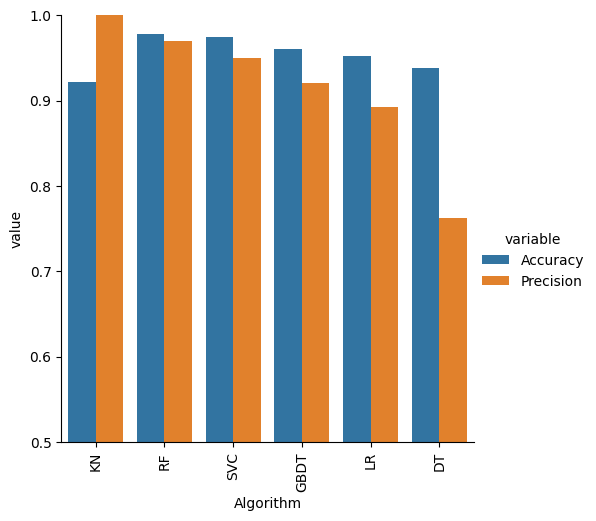

In [ ]:
#Plotting the categorical plot to visualize algorithm performance
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Model improve
#Change the max_features parameter of TfIdf

In [ ]:
#Creating a DataFrame to store algorithm performance with max_features=3000
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
#Creating a DataFrame to store algorithm performance with scaling
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
#Merging performance DataFrame with the DataFrame containing results after scaling
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
#Merging new_df DataFrame with the DataFrame containing results after scaling
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
#Creating a DataFrame to store accuracy and precision scores for each algorithm based on number of characters as features
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
#Merging DataFrames new_df_scaled and temp_df on the 'Algorithm' column
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.921588,1.000000,0.921588,1.000000,0.921588,1.000000,0.921588,1.000000
1,RF,0.978703,0.969697,0.978703,0.969697,0.978703,0.969697,0.978703,0.969697
2,SVC,0.974831,0.949495,0.974831,0.949495,0.974831,0.949495,0.974831,0.949495
3,GBDT,0.960310,0.920455,0.960310,0.920455,0.960310,0.920455,0.960310,0.920455
4,LR,0.952565,0.892857,0.952565,0.892857,0.952565,0.892857,0.952565,0.892857
5,DT,0.938045,0.762887,0.938045,0.762887,0.938045,0.762887,0.938045,0.762887


## **Voting Classifier:**

**Type:** Ensemble Learning (Classification)

**Description:** The Voting Classifier combines multiple individual classification models and aggregates their predictions using a majority vote or averaging to make final predictions. It can improve the overall performance and robustness by leveraging the strengths of different base classifiers.

**Usage:** Voting Classifier is beneficial when individual classifiers have varying strengths and weaknesses or when there is uncertainty about which model is best suited for the data. It's commonly used in practice to achieve higher accuracy and stability in classification tasks.

In [ ]:
#Voting Classifier
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)

from sklearn.ensemble import VotingClassifier

In [ ]:
#Creating a VotingClassifier instance with specified estimators and voting strategy
voting = VotingClassifier(estimators=[('knn', knc),('rfc', rfc),('svm', svc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [ ]:
#Printing the accuracy and precision scores of the voting classifier
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748305905130688
Precision 1.0


In [ ]:
#Applying stacking
estimators=[('knn', knc),('rfc', rfc),('svm', svc)]
final_estimator=RandomForestClassifier()

In [ ]:
#Importing the StackingClassifier from the ensemble module in scikit-learn
from sklearn.ensemble import StackingClassifier

In [ ]:
#Creating a StackingClassifier instance with specified estimators and final estimator
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
#Fitting the StackingClassifier on the training data and making predictions on the test data
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825750242013552
Precision 0.944954128440367


In [ ]:
#Saving the TF-IDF vectorizer and the Multinomial Naive Bayes model to pickle files
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))